**LATIHAN LAB SESSION 2**

In [1]:
!pip install langchain_community
!pip install replicate

In [2]:
import pandas as pd
import os
from google.colab import userdata

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
from langchain_community.llms import Replicate

llm = Replicate(
  model = "ibm-granite/granite-3.3-8b-instruct"
)

In [10]:
from langchain_community.llms import Replicate

# Define parameters
parameters = {
"top_k": 5,
"top_p": 1.0,
"max_tokens": 2000, # maksimal output
"min_tokens": 0, # minimal output
"random_seed": None,
"repetition_penalty": 1.0,
"temperature": 0.0, # kalo pengen jawaban kreatif, ditinggin. kalo pengen jawaban konsisten, direndahin
"stopping_criteria": "length (256 tokens)",
"stopping_sequence": None
}

# Define the model
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  input=parameters

)

#**Capstone Project (Testing Prompt)**

In [12]:
import pandas as pd

Read the dataset

In [13]:
df = pd.read_csv("Worldwide Travel Cities Dataset (Ratings and Climate).csv")

Display the dataset

In [14]:
df

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,778d28df-a4fa-4328-896e-4a9f80216fda,Maun,Botswana,africa,"A gateway to the Okavango Delta, offering a se...",-19.986095,23.422435,"{""1"":{""avg"":26.6,""max"":32,""min"":21.2},""2"":{""av...","[""One week"",""Short trip""]",Mid-range,3,5,5,1,2,3,3,2,4
556,44fb18eb-2641-46ab-b3fa-df6870ba3c74,Gothenburg,Sweden,europe,"A charming city with picturesque canals, lush ...",57.707233,11.967017,"{""1"":{""avg"":1.4,""max"":3.2,""min"":-1.2},""2"":{""av...","[""Weekend"",""One week"",""Short trip""]",Mid-range,4,3,4,3,3,4,3,4,3
557,8c8c7203-2a45-44ba-9fb2-b5158104375e,Manchester,United Kingdom,europe,"Industrial heritage meets modern creativity, w...",53.479489,-2.245115,"{""1"":{""avg"":4.7,""max"":7.1,""min"":2},""2"":{""avg"":...","[""Weekend"",""One week"",""Short trip""]",Mid-range,4,2,2,1,4,4,3,4,2
558,ba72b976-10f9-4415-a818-32cf17d8e649,Copenhagen,Denmark,europe,"Charming canals, vibrant neighborhoods, and a ...",55.686724,12.570072,"{""1"":{""avg"":2.6,""max"":4.2,""min"":0.6},""2"":{""avg...","[""One week"",""Short trip"",""Weekend""]",Mid-range,5,2,3,2,4,4,3,5,2


Display the first 5 rows of the dataset

In [15]:
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


Display information for the data type in each column

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            560 non-null    int64  
 16  wellness           560 non

Check Unique Categories

In [17]:
for col in df.select_dtypes(include=["object"]).columns:
  print(f'{col}: {df[col].nunique()} unique categories')

id: 560 unique categories
city: 559 unique categories
country: 167 unique categories
region: 7 unique categories
short_description: 560 unique categories
avg_temp_monthly: 545 unique categories
ideal_durations: 21 unique categories
budget_level: 3 unique categories


Check Missing Values

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

id                   0
city                 0
country              0
region               0
short_description    0
latitude             0
longitude            0
avg_temp_monthly     0
ideal_durations      0
budget_level         0
culture              0
adventure            0
nature               0
beaches              0
nightlife            0
cuisine              0
wellness             0
urban                0
seclusion            0
dtype: int64


Check Outlier

In [19]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print(outliers_count)

latitude       1
longitude      0
culture        0
adventure      0
nature         0
beaches        0
nightlife      0
cuisine        0
wellness     166
urban          0
seclusion      0
dtype: int64


Install Langchain_experimental library

In [20]:
!pip install langchain_experimental

Create a Pandas DataFrame Agent

In [21]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

Prompt the agent to display the dataset

In [22]:
agent.invoke({"input": "Display the dataset"})



> Entering new AgentExecutor chain...
Thought: The user wants to display the dataset. The dataset is already provided in the context as a table. I will format it for clarity.

Final Answer: Here is the dataset displayed in a tabular format:

| id                                   | city           | country   | region        | short_description                                                                                                                                                        | latitude | longitude | avg_temp_monthly                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | ideal

{'input': 'Display the dataset',
 'output': 'Here is the dataset displayed in a tabular format:\n\n| id                                   | city           | country   | region        | short_description                                                                                                                                                        | latitude | longitude | avg_temp_monthly                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | ideal_durations                     | budget_level   | culture | adventure | nature | beaches | nightlife | cuisine | wellness | urban | seclusion |\n

Prompt the agent to check the missing values in the dataset

In [23]:
agent.invoke({"input": "Check the missing values in the dataset"})



> Entering new AgentExecutor chain...
Thought: To check for missing values in the dataset, I will use the `isnull()` function from pandas, which returns a DataFrame where the values are True if the value in the original DataFrame is missing, and False otherwise. Then, I will use the `sum()` function to count the number of missing values in each column.

Action: python_repl_ast

Action Input: 
```python
df.isnull().sum()
```

id                   0
city                 0
country              0
region               0
short_description    0
latitude             0
longitude            0
avg_temp_monthly     0
ideal_durations      0
budget_level         0
culture              0
adventure            0
nature               0
beaches              0
nightlife            0
cuisine              0
wellness             0
urban                0
seclusion            0
dtype: int64Final Answer: There are no missing values in the dataset. All columns have a count of 0, indicating that there are no mi

{'input': 'Check the missing values in the dataset',
 'output': 'There are no missing values in the dataset. All columns have a count of 0, indicating that there are no missing values.'}

Calculate IQR for numerical columns

In [24]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print(outliers_count)

print("\nCalculated IQR for numerical columns:")
print(IQR)

latitude       1
longitude      0
culture        0
adventure      0
nature         0
beaches        0
nightlife      0
cuisine        0
wellness     166
urban          0
seclusion      0
dtype: int64

Calculated IQR for numerical columns:
latitude      38.405145
longitude    114.459279
culture        1.000000
adventure      1.000000
nature         1.000000
beaches        2.000000
nightlife      2.000000
cuisine        1.000000
wellness       0.000000
urban          2.000000
seclusion      2.000000
dtype: float64


Prompt the agent to Show the unique values and their counts for the 'Budget Level' column

In [26]:
agent.invoke({"input": "Show the unique values and their counts for the 'Budget Level' column."})



> Entering new AgentExecutor chain...
Thought: To find the unique values and their counts for the 'Budget Level' column, I will use the `value_counts()` function on the 'Budget Level' column of the dataframe `df`.

Action: python_repl_ast

Action Input: 
```python
df['budget_level'].value_counts()
```

budget_level
Mid-range    339
Budget       145
Luxury        76
Name: count, dtype: int64Final Answer: The unique values in the 'Budget Level' column and their respective counts are:

- Mid-range: 339
- Budget: 145
- Luxury: 76

> Finished chain.


{'input': "Show the unique values and their counts for the 'Budget Level' column.",
 'output': "The unique values in the 'Budget Level' column and their respective counts are:\n\n- Mid-range: 339\n- Budget: 145\n- Luxury: 76"}

Display the distribution of budget levels

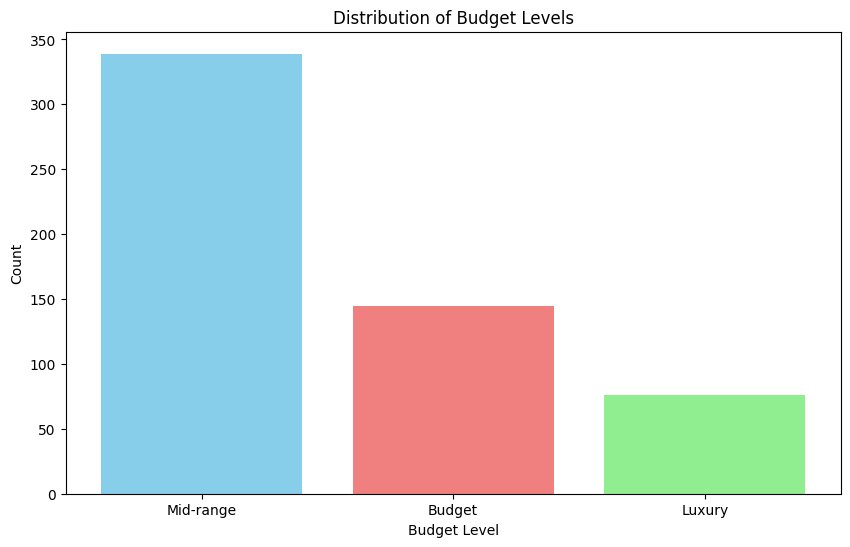

In [27]:
import matplotlib.pyplot as plt

budget_counts = df['budget_level'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(budget_counts.index, budget_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Budget Level')
plt.ylabel('Count')
plt.title('Distribution of Budget Levels')
plt.xticks(rotation=0)
plt.show()

# Capstone Project: Worldwide Travel Cities Classification and Recommendation

## Title:
**Worldwide Travel Cities Budget Classification and Destination Recommendation Based on Traveler Preferences**

## Project Description:
This project aims to:
- Predict the budget level of travel cities (Budget / Mid-range / Luxury) using machine learning models.
- Provide city recommendations based on traveler preferences for tourism aspects such as culture, adventure, nature, etc.

Dataset: *Worldwide Travel Cities Dataset (Ratings and Climate)*.

Import libraries & read the dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('/content/Worldwide Travel Cities Dataset (Ratings and Climate).csv')
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


Preprocessing Dataset

In [29]:
df = df.drop(columns=['id', 'city', 'country', 'short_description'])

def extract_avg_temp(row):
    temps = json.loads(row)
    monthly_avgs = [temps[str(i)]['avg'] for i in range(1, 13)]
    return np.mean(monthly_avgs)

df['avg_temp_year'] = df['avg_temp_monthly'].apply(extract_avg_temp)
df = df.drop(columns=['avg_temp_monthly'])

le_region = LabelEncoder()
df['region'] = le_region.fit_transform(df['region'])

le_budget = LabelEncoder()
df['budget_level_encoded'] = le_budget.fit_transform(df['budget_level'])
df = df.drop(columns=['budget_level'])

df['ideal_durations_len'] = df['ideal_durations'].apply(lambda x: len(eval(x)))
df = df.drop(columns=['ideal_durations'])

df.head()

,region,latitude,longitude,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,avg_temp_year,budget_level_encoded,ideal_durations_len
0,2,45.464194,9.189635,5,2,2,1,4,5,3,5,2,14.750000,1,2
1,5,-17.290947,177.125786,2,4,5,5,2,3,4,1,5,26.975000,1,2
2,4,50.117190,-122.954302,3,5,5,2,3,3,4,2,4,6.808333,1,3
3,4,20.987700,-101.000000,5,3,3,1,3,4,3,4,2,19.533333,2,3
4,1,-7.245972,112.737827,4,3,3,2,3,4,3,4,2,28.758333,0,2


Show the distribution of budget level

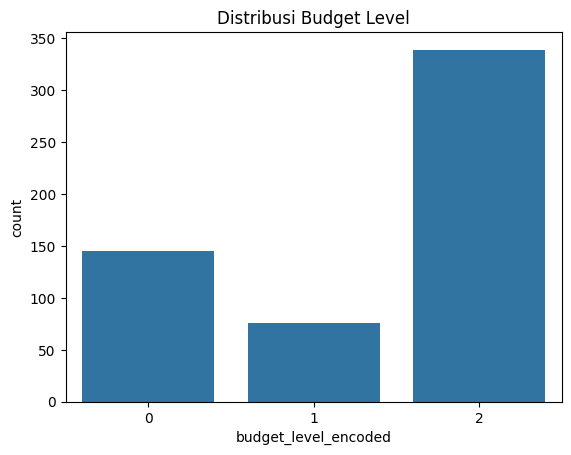

In [31]:
sns.countplot(x=df['budget_level_encoded'])
plt.title("Distribution Budget Level")
plt.show()

Show the heatmap correlation between features

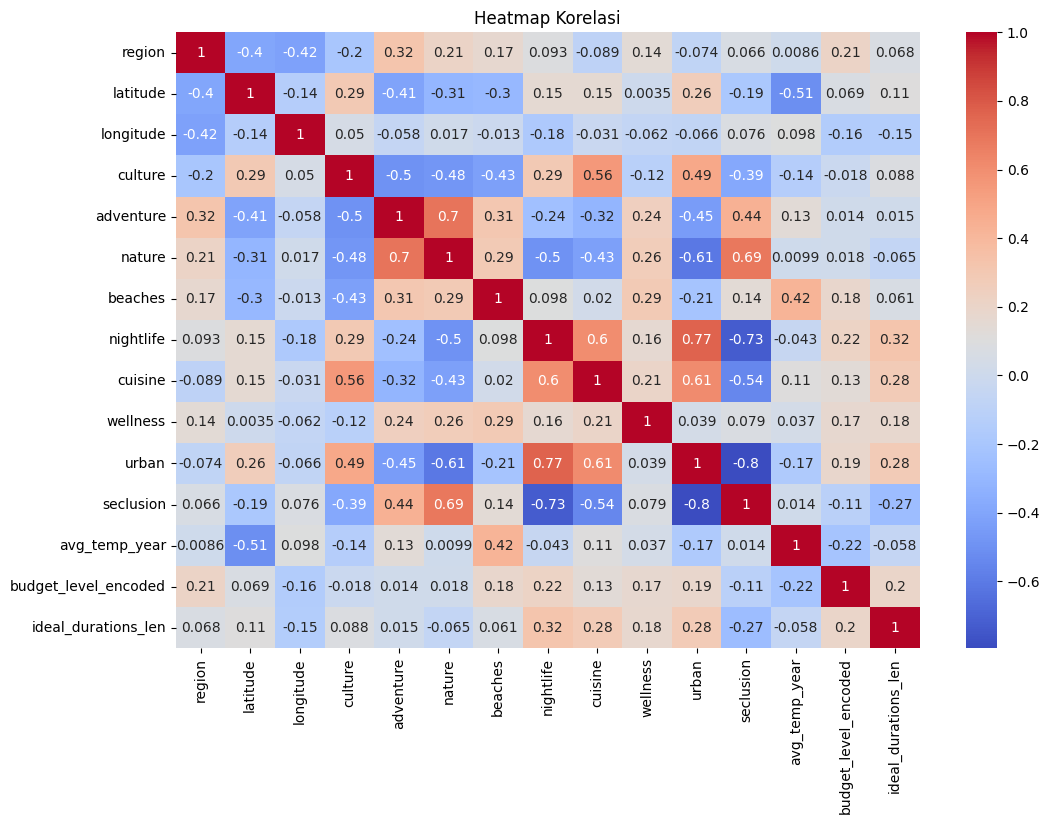

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Correlation")
plt.show()

Encoding & Classification Model

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.67      0.25      0.36        16
           2       0.81      0.88      0.84        73

    accuracy                           0.78       112
   macro avg       0.73      0.65      0.66       112
weighted avg       0.77      0.78      0.76       112



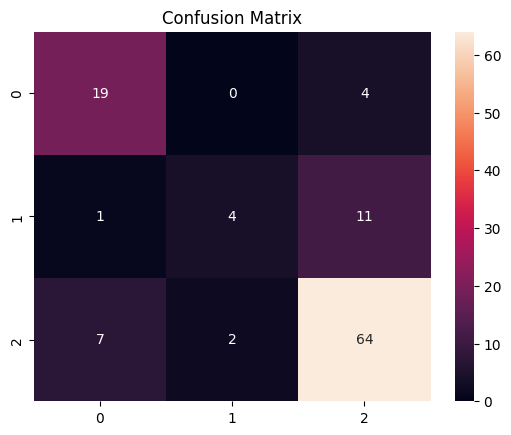

In [33]:
X = df.drop(columns=['budget_level_encoded'])
y = df['budget_level_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Recommendation System

In [34]:
def recommend_city(preference_dict, top_n=5):
    subset = df.copy()
    for feature, target_score in preference_dict.items():
        subset[f'{feature}_diff'] = np.abs(subset[feature] - target_score)
    subset['total_diff'] = subset[[f'{f}_diff' for f in preference_dict]].sum(axis=1)
    return subset.sort_values(by='total_diff')[['region'] + list(preference_dict.keys())].head(top_n)

user_pref = {'culture': 5, 'adventure': 4, 'nature': 4, 'nightlife': 3}
recommend_city(user_pref)

,region,culture,adventure,nature,nightlife
432,6,5,4,4,3
347,1,5,4,4,3
444,4,5,3,4,3
471,2,5,3,4,3
390,4,5,3,4,3


**Conclusion**
- The Random Forest model successfully predicts city-level budget categories with good accuracy.
- The most influential features are culture, urban, and wellness scores.
- A simple recommendation system can help travelers find cities that match their preferences.

**Recommendations**
- The dataset can be expanded by adding transportation data or accommodation prices.
- The recommendation system can be expanded into a web-based app for travelers.



#**Tourist Destination Clustering with LLM Embeddings**

Install sentence-transformers & Load short descriptions

In [35]:
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


df_text = pd.read_csv('/content/Worldwide Travel Cities Dataset (Ratings and Climate).csv')
descriptions = df_text['short_description'].fillna("").tolist()

Load LLM embedding model (distiluse-base multilingual)

In [36]:
model_embed = SentenceTransformer('distiluse-base-multilingual-cased-v1')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generate embeddings

In [37]:
embeddings = model_embed.encode(descriptions)

Clustering (k=4)

In [38]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(embeddings)

Add cluster results to dataframe

In [39]:
df_text['cluster'] = labels

Applying Principal Component Analysis (PCA)

In [40]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

Visualization

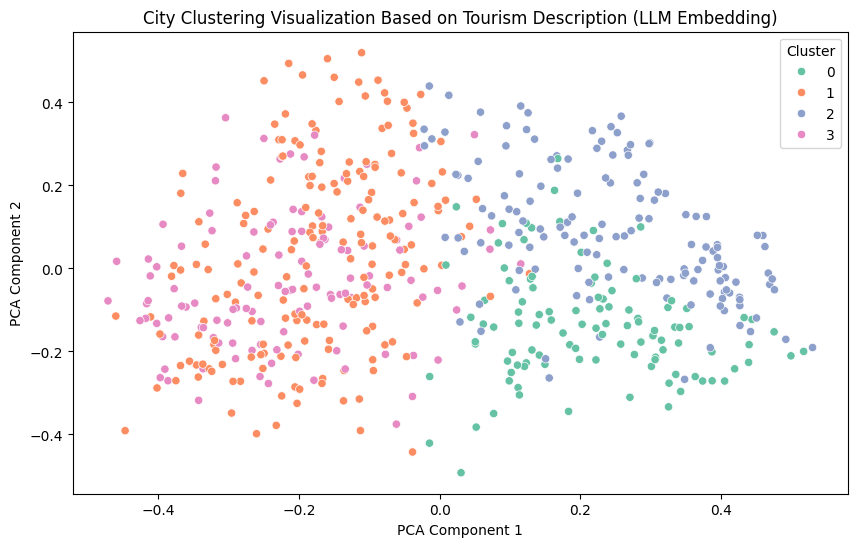

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette="Set2")
plt.title("City Clustering Visualization Based on Tourism Description (LLM Embedding)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

See examples of cities in each cluster.

In [47]:
for i in range(4):
    print(f"\n Cluster {i}:")
    display(df_text[df_text['cluster'] == i][['city', 'region', 'short_description']].head(3))


 Cluster 0:


,city,region,short_description
2,Whistler,north_america,Snow-capped peaks and lush forests create a se...
5,Nuuk,north_america,"Rugged landscapes meet the calm of icy fjords,..."
14,Bagan,asia,"Ancient temples rise from misty plains, where ..."



 Cluster 1:


,city,region,short_description
0,Milan,europe,"Chic streets lined with fashion boutiques, his..."
3,Guanajuato,north_america,Winding cobblestone streets and colorful facad...
8,Nafplio,europe,"Charming cobblestone streets, vibrant bougainv..."



 Cluster 2:


,city,region,short_description
1,Yasawa Islands,oceania,"Crystal-clear waters, secluded beaches, and vi..."
7,Kingston,north_america,"Vibrant streets pulse with reggae rhythms, whi..."
20,Trondheim,europe,"Charming wooden houses, crisp Nordic air, and ..."



 Cluster 3:


,city,region,short_description
4,Surabaya,asia,Bustling streets filled with the aroma of loca...
6,Windhoek,africa,"A blend of modernity and tradition, with bustl..."
12,Nagasaki,asia,Steeped in history and surrounded by lush hill...
